In [3]:
import networkx as nx
import random as rd
import scipy as sp
import numpy as np
import scipy.io
opts = {"with_labels": True, "node_color":'grey'}


#Funcion para seleccionar los nodos que se reconectan, a partir de nkp
#ESTA FUNCION NO SE USA
'''
def set_nodes_to_reconnect(n,k,p):
    nodes = []
    
    for i in range(0,round(n*k*p)):
        while len(nodes) < round(n*k*p):
            node = rd.randint(0,n-1)
            if not node in nodes: 
                nodes.append(node)
    print("Los nodos que se van a recablear son:", nodes)
    return nodes
     

'''
#Funcion para conectar los nodos
def connect_nodes(G,n,k,p):
    nodes_senders = []
    nodes_receivers = []
    while len(nodes_receivers)< (round(n*k*p)-1):
        for node in G:
            if rd.random() < p:
                for connection in range(1,k+1):
                    receiver_node = rd.randint(0,n-1)
                    if receiver_node != node and not G.has_edge(receiver_node, node):
                        G.remove_edge(node, ((node+connection)%n))
                        G.add_edge(node,receiver_node)
                        nodes_senders.append(node)
                        nodes_receivers.append(receiver_node)                           
    print("Los nodos que envian la conexion son", nodes_senders)
    print("Los nodos que reciben la conexion son", nodes_receivers)               
    return G,nodes_senders,nodes_receivers
    

#Funcion para obtener los vecinos de los nodos
def get_neighbors(G, node):
    neighbors = []
    #for node in nodes:
    for node_G in G:
            if G.has_edge(node,node_G):
                neighbors.append(node_G)
    return neighbors


#Inicia una red conectando cada nodo a sus 2k vecinos
def create_regular_network(n, k,p):
    if k > 0.16*n:
        raise Exception("k debe ser <= que el 16% de n")
    G = nx.cycle_graph(n)
    for v in G:
        for o in range(2, k+1): #decide hasta que nodo se va a conectar
            G.add_edge(v, (v+o) % n)#crea la conexion
    print("El numero de conexiones de largo alcance a recablear son:",round(n*k*p))
    return G


def new_conn_S(G,nodes_senders,nodes_receivers):
    for i in range(0,len(nodes_senders)):
        neighbors = get_neighbors(G, nodes_receivers[i])
        G.add_edge(nodes_senders[i], neighbors[rd.randint(0,len(neighbors)-1)])
    return G


def new_conn_R(G,nodes_senders,nodes_receivers):
    for i in range(0,len(nodes_receivers)):
        neighbors = get_neighbors(G, nodes_senders[i])
        G.add_edge(nodes_receivers[i], neighbors[rd.randint(0,len(neighbors)-1)])
    return G


#Matriz de acoplamiento
def matriz_acoplaminento(G):
    ma = np.zeros([len(G),len(G)])
    for nodo in G:
        for i in range(0,len(G)):
            if nodo != i:
                if G.has_edge(nodo,i):
                    ma[nodo,i] = 1
                else:
                    ma[nodo,i] = 0
            else:
                ma[nodo,i] = -(nx.degree(G,nodo))
                #ma[nodo,i] = -1
    return ma 






El numero de conexiones de largo alcance a recablear son: 6
Los nodos que envian la conexion son [10, 10, 13, 13, 2, 2]
Los nodos que reciben la conexion son [14, 3, 5, 4, 10, 9]
[[-5.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.]
 [ 1. -4.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  1. -6.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  0.]
 [ 0.  1.  0. -5.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -4.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  1. -5.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  1. -5.  1.  1.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1. -4.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  0.  0.  1.  1. -6.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  1.  1. -6.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  0.  0.  0.  0.  1.  1. -7.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0. -3.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.

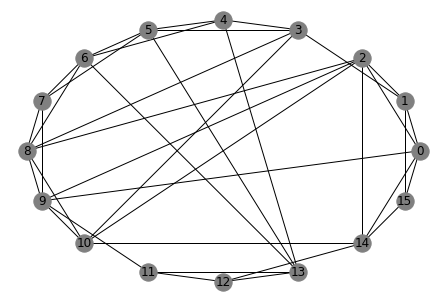

In [13]:
n,k,p  = 16,2,0.2
G = create_regular_network(n,k,p)
G,nodes_senders,nodes_receivers = connect_nodes(G, n,k,p)
if len(nodes_receivers) != round(n*k*p):
    raise Exception("No se generaron las nkp conexiones requeridas, considere simular nuevamente")
G = new_conn_S(G,nodes_senders,nodes_receivers)
G = new_conn_R(G,nodes_senders,nodes_receivers)
ma = matriz_acoplaminento(G)
scipy.io.savemat('c:/Users/Administrador/Documents/1MyStuffs/Master_FIME/TESIS/codigos/osciladores-Matlab/MatAcop.mat', mdict={'arr': ma})
print(ma)

print("El coeficiente de agrupamiento es:",nx.algorithms.average_clustering(G))
print("El promedio del camino mas corto es:",nx.average_shortest_path_length(G))
nx.draw_circular(G,**opts)

In [20]:
#Calculo de los valores propios de la matriz de acoplamiento
vp = np.linalg.eigvals(ma)
vp = sorted(vp,reverse=True)
print("Los valores propios son:")
print(vp)
print("El valos propio Lamda2 es:")
print(vp[1])

Los valores propios son:
[-0.1305329842348587, -0.5593809216576154, -0.7592822315716243, -0.8271563206124085, -1.2553799020638667, -1.4438673451521402, -1.7457101659647603, -2.016786542159087, -2.198811784539557, -2.259360507770955, -2.770062204968627, -2.940183664604841, -3.1380663290727253, -3.257892092545476, -3.385729516417868, -3.8458900030020353, -3.99356783266632, -4.149192900668032, -4.309912462374662, -4.433231306622853, -4.7115068769214, -4.756236976017107, -4.843567538901277, -4.97765775052686, -5.127304200831648, -5.361274041408649, -5.394292955052908, -5.734527031477722, -5.803831191722519, -5.898463891530734, -6.076726546237395, -6.310266640984533, -6.475306820166498, -6.65221243649948, -6.867014260094454, -6.963685082759549, -7.065708589447058, -7.151631964616641, -7.400507387804337, -7.676478445448765, -7.7219762783709855, -7.782209659890806, -7.946235022867521, -8.222676822921855, -8.784890103493327, -9.11811635820633, -9.399893163601819, -9.749886218502544, -9.8587280